SOal 1
Anda diminta untuk membuat sebuah diagram pipeline untuk membuat model yang nantinya akan dijalankan secara otomatis oleh tim Ops. Susunlah komponen-komponen berikut berdasarkan urutan yang benar dan selanjutnya berikan alasan mengapa anda menyusun pipeline seperti itu (akan lebih baik disertai dengan sumber referensi untuk menguatkan pernyataan anda)

Jawab :


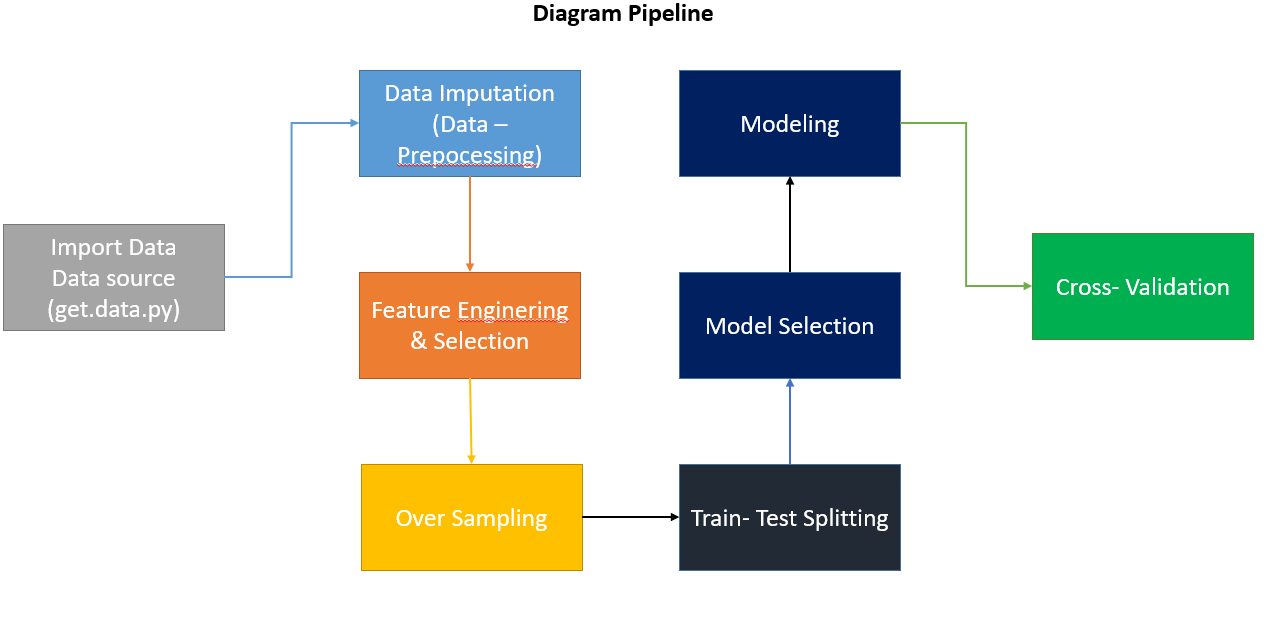

1. Import Data       
2. Data Imputation
3. Feature Engineering & Selection 
4. Over sampling 
5. Train- Test Splitting
6. Model Selection 
7. Modeling
8. Cross-Validation

Alasan saya mengurutkan komponen2 diatas yaitu :
Pertama adalah tahap untuk pengambilan data (data source), kemudian adalah data imputatioan atau data pre processing merapikan membersihkan data setelah itu menggunakan feature engineering & selection untuk melihat antar variable apakah ter dapat korelasi, data mana saja yang baik bisa dipakai kemudian barulah tahap selanjutnya over sampling, dari data korelasi tadi terlihat apakah ada data yang tidak seimbang atau tidak balance misal dari data tersebut di dapat tidak balance maka perlu adanya over sampling, jika datanya sudah balance selanjutnya train test splitting kita pilih data tesnya yang mana dan data train yang mana, kemudian barulah menggunakan model selection contohnya menggunakan model decision tree dalam pengujiannya kemudian modeling dan yang terakhir cros validation untuk menilai bagaimana hasil analisa statistik menggeneralisasi kumpulan data independen (mengevaluasi kinerja model)

Explanatory Model Analysis: Model Dependent - Advanced (70 poin)
Tim marketing meminta anda sebagai Marketing Researcher untuk meneliti apa yang menyebabkan seseorang tertarik untuk merespon marketing campaign yang sudah dibuat oleh mereka. Insight yang dihasilkan nanti rencananya akan digunakan untuk membuat strategi marketing yang tepat di masa mendatang. 

Anda merasa yakin bahwa untuk mengetahui faktor apa saja yang dapat mempengaruhi seseorang untuk merespon suatu campaign dapat diekstrak langsung dari data tanpa harus membuat model. Analisisnya secara deskriptif (EDA) apa saja faktor yang membuat seseorang merespon campaign dari tim marketing. Berikan penjelasan dan alasan mengapa variabel tertentu berasosiasi dengan variabel target (Response)

Dengan begitu banyaknya faktor yang mempengaruhi seseorang untuk merespon campaign, anda berpikir bahwa akan lebih baik menggunakan model machine learning untuk menjelaskan dampak dari tiap variabel sehingga dapat diketahui variabel mana yang memiliki pengaruh terbesar. 
Buatlah model machine learning untuk masalah campaign marketing berikut baik menggunakan variabel yang anda pilih pada poin 1 maupun menggunakan semua variabel yang anda miliki dengan aturan:
Selalu menggunakan model baseline (logistic regression, KNN, Naive Bayes) sebagai pembanding untuk model yang lebih kompleks
Seleksi model terbaik dari sekian banyak model yang anda gunakan
Interpretasikan hasil dari model sesuai dengan jenis masing-masing model
Berikan rekomendasi yang berdasarkan hasil interpretasi dari model terbaik

In [43]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot

In [44]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [45]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#Data marketing campaign
data = pd.read_excel("/content/drive/MyDrive/SQL/marketing_campaign.xlsx")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [49]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [50]:
# check Data marketing campaign
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [51]:
data.shape

(2240, 29)

In [52]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [53]:
data.isna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Preprocessing Data

In [54]:
# count 'Response' class frequencies
data['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

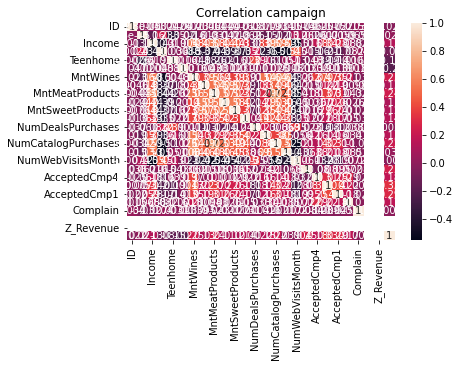

In [55]:
import seaborn as sns

import matplotlib.pyplot as plt

hm = sns.heatmap(data.corr(), annot = True)

hm.set(title = "Correlation campaign")

plt.show()

Simple **EDA**

In [56]:
# check correlation matrix of data
data.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


In [57]:
# remove id, customer_code, and co_name from dataset
data = data.drop(
    ['Education', 'Marital_Status', 'Dt_Customer','ID',],
    axis = 1
)

# check its first 5 rows
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0


In [58]:
# remove id, customer_code, and co_name from dataset
data = data.drop(
    ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp5',],
    axis = 1
)

# check its first 5 rows
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0


In [59]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing


Income    24
dtype: int64

In [60]:
data.dropna(subset=['Income'], inplace=True)
data.reset_index(inplace=True)


Train-Test Split

In [61]:
# assign 'Response' column to y 
y = data['Response'].values
# assign all columns except 'Response' to X
X = data.drop(['Response'], axis = 1).values

In [62]:
# check y dimension
y.shape

(2216,)

In [63]:
# check X dimension
X.shape

(2216, 20)

In [64]:
# split data to train and test data
# with test size is 30% of overall data
# use stratified sampling
# and set RNG to 1000
X_train_Response, X_test_Response, y_train_Response, y_test_Response = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [65]:
# Check X_train_Response dimension
X_train_Response.shape

(1551, 20)

In [66]:
# check y_train_Response class distribution
np.unique(y_train_Response, return_counts=True)[1]

array([1318,  233])

In [67]:
# check X_test_Response dimension
X_test_Response.shape

(665, 20)

In [68]:
# check y_test_Response class distribution
np.unique(y_test_Response, return_counts=True)[1]

array([565, 100])

In [69]:
# Check y_train_sales dimension
y_train_Response.shape

(1551,)

In [70]:
# Check y_test_sales dimension
y_test_Response.shape

(665,)

Model Dependent Method

Linear Regression
Linear Regression Modeling using StatsModel

In [71]:
# define model
X_train_int = sm.add_constant(X_train_Response)
# fit regression model to data
logistic_reg_sm = sm.Logit(y_train_Response, X_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.324218
         Iterations 19


In [78]:
logistic_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1551
Model:                          Logit   Df Residuals:                     1532
Method:                           MLE   Df Model:                           18
Date:                Sun, 17 Apr 2022   Pseudo R-squ.:                  0.2337
Time:                        14:43:39   Log-Likelihood:                -502.86
converged:                       True   LL-Null:                       -656.23
Covariance Type:            nonrobust   LLR p-value:                 1.982e-54
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0003      0.000      2.232      0.026    3.46e-05       0.001
x2            -0.0041      0.007     -0.574      0.566      -0.018       0.010
x3          9.391e-06   7.91e-06      1.188      0.235    -6.1e-06    2.49e-05
x4             0.1748      0.221      0.791      0.429      -0.259       0.608
x5            -0.9632      0.214     -4.493      0.000      -1.383      -0.543
x6            -0.0258      0.003     -8.377      0.000      -0.032      -0.020
x7             0.0018      0.000      5.399      0.000       0.001       0.002
x8             0.0005      0.002      0.194      0.846      -0.004       0.005
x9             0.0018      0.001      3.458      0.001       0.001       0.003
x10           -0.0022      0.002     -1.200      0.230      -0.006       0.001
x11            0.0010      0.002      0.431      0.667      -0.003       0.005
x12            0.0034      0.002      2.064      0.039       0.000       0.007
x13            0.0372      0.047      0.795      0.427      -0.054       0.129
x14            0.0824      0.038      2.193      0.028       0.009       0.156
x15            0.0645      0.041      1.568      0.117      -0.016       0.145
x16           -0.1633      0.035     -4.694      0.000      -0.231      -0.095
x17            0.2092      0.053      3.960      0.000       0.106       0.313
x18           -0.4787      1.212     -0.395      0.693      -2.854       1.897
const          0.1123        nan        nan        nan         nan         nan
x19            0.4117        nan        nan        nan         nan         nan
==============================================================================
"""

1. Anda merasa yakin bahwa untuk mengetahui faktor apa saja yang dapat mempengaruhi seseorang untuk merespon suatu campaign dapat diekstrak langsung dari data tanpa harus membuat model. Analisisnya secara deskriptif (EDA) apa saja faktor yang membuat seseorang merespon campaign dari tim marketing. Berikan penjelasan dan alasan mengapa variabel tertentu berasosiasi dengan variabel target (Response)

Jawaban :
Interpretasi dari analisa yang saya lakukan terkait faktor apa saja yang berpengaruh untuk respon campaign, pertama saya melakukan input data kemudian melihat data tersebut deskripsinya, dari data tersebut diperoleh data yang null dibagian income kemudian saya bersihkan datanya dengan cara menghilangkan data tersebut, kemudian saya mengamati variable independent yang kira-kira tidak perlu seperti Education, Marital_Status, Dt_Customer, AcceptedCmp3, AcceptedCmp4, AcceptedCmp1,AcceptedCmp2,AcceptedCmp5 mengapa tidak perlu sebelumnya sudah dilihat anatar korelasinya dan bentuk data tersebut bukan numerik, maka dalam analisa ini saya menggunakan regresi logistik dikarenakan variable target Response dalam bentuk kategori yang dalam hasilnya Pseudo R-squ.:	0.2337 kecil sebesar 23% artinya variable yang digunakan hanya mampu dijelaskan sebesar itu, selebihnya 77% ada divariable lain diluar itu.

In [79]:
# check model coefficient
logistic_reg_sm.params

array([ 2.84014641e-04, -4.06339355e-03,  9.39050869e-06,  1.74838077e-01,
       -9.63218372e-01, -2.57568496e-02,  1.80024601e-03,  4.62212134e-04,
        1.76802033e-03, -2.16844259e-03,  9.72367063e-04,  3.36800409e-03,
        3.71940593e-02,  8.23784488e-02,  6.45356552e-02, -1.63281637e-01,
        2.09161994e-01, -4.78742665e-01,  1.12267542e-01,  4.11653384e-01])

In [80]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train_Response, y_train_Response)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1000)

In [81]:
# check model coefficient
logistic_reg.coef_

array([[ 2.35491987e-04, -8.44709070e-04, -1.22438260e-05,
         9.34013868e-05, -1.92049474e-04, -2.38710648e-02,
         1.63518913e-03, -1.69877666e-04,  2.54354151e-03,
        -4.43332164e-03, -2.27767486e-04,  7.08131390e-03,
         2.65349846e-04,  6.01978889e-04,  3.68434791e-04,
        -1.44604658e-03,  9.75824919e-04, -2.20115819e-06,
        -2.96428716e-06, -1.08690529e-05]])

In [82]:
# check the intercept
logistic_reg.intercept_

array([-9.88100731e-07])

**Model Evaluation**

In [83]:
# predict
pred_result = logistic_reg.predict(X_test_Response)
pred_proba_result = logistic_reg.predict_proba(X_test_Response)

In [84]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test_Response, pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.862069,0.444444,0.845113,0.653257,0.799268
recall,0.973451,0.120000,0.845113,0.546726,0.845113
f1-score,0.914381,0.188976,0.845113,0.551679,0.805297
support,565.000000,100.000000,0.845113,665.000000,665.000000


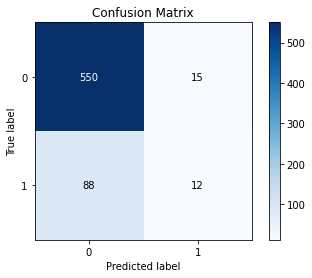

In [85]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test_Response, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


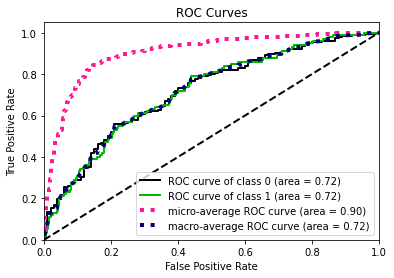

In [86]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test_Response, pred_proba_result);

In [87]:
# check f1-score
metrics.f1_score(y_test_Response, pred_result)

0.1889763779527559